In [1]:
import pandas as pd 
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

For Chart#9 and Chart#10 the data source is same, the manual download process is same, data cleaning process is same.
Following piece of code cleans and joins both the data sets.

9)  Still, gun homicides (like all homicides) have declined over the past couple decades.  
10) Most gun deaths are suicides

+ Data Access :Yes. https://webappa.cdc.gov/sasweb/ncipc/mortrate.html
+ Upto Date   :No.  The data is available until 2017.
+ Quality     :Good.

+ Data Source: The data is downloaded from https://webappa.cdc.gov/sasweb/ncipc/mortrate.html
               ** Steps followed to collect the data: *
               We need to repeat the data collection process for year range 1999 to 2018 and 1981 to 1998
               and for Intent or Manner of injury 'Homicide' and 'Suicide'
               1. choose Year range as '1999 to 2017 (ICD-10), National and Regional'
               2. choose Intent or Manner of injury as 'Homicide' (for first batch) and repeat the same 
                  for 'Suicide'
               3. choose Cause or mechanism of the injury as 'Firearm'
               4. choose select specific options
                   Census Region: United States
                   Year of report: 1999 to 2017
                   Race: All races
                   Sex : Both Sexes
               5. Advanced Options:
                   Select age groups: All
                   Select output groups: Year
                   Select Standardized Year for Age-Adjusting: Use 2000 as the standard year.

In [4]:
# Data Reading and Cleaning
# Downloaded the data from https://webappa.cdc.gov/sasweb/ncipc/mortrate.html as 
# FirearmHomicide-1981-1998.csv - Homicides by Firearm between 1981 to 1998
# FirearmHomicide-1999-2018.csv - Homicides by Firearm between 1999 to 2017
# Firearm-Suicides-1999-2018.csv - Suicides by Firearm between 1999 to 2017
# The manual process is explained above.
# and uploaded to GIT

# Read Firearm homicide csv from 1981 to 1998 from GIT
fire_arm_1 = pd.read_csv("https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmHomicide-1981-1998.csv") 

# Remove the last row which is the summation row
fire_arm_1=fire_arm_1[:-1] 

# Read Firearm homicide csv from 1999 to 2017 from GIT
fire_arm_2 = pd.read_csv("https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmHomicide-1999-2018.csv") 

# Remove the last row which is the summation row
fire_arm_2=fire_arm_2[:-1] 
# Dropped the not needed column 'Age-Adjusted Rate'
fire_arm_2.drop('Age-Adjusted Rate', axis=1, inplace=True)


# Read Firearm suicide data from 1999 to 2017 from GIT
firearm_suicide_2=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Firearm-Suicides-1999-2018.csv')
# Remove the last row which is the summation row
firearm_suicide_2=firearm_suicide_2[:-1]
# Dropped the not needed column 'Age-Adjusted Rate'
firearm_suicide_2.drop('Age-Adjusted Rate', axis=1, inplace=True)

# Concat all the dataframes into one
fa_homicide_suicide=pd.concat([fire_arm_1,fire_arm_2,firearm_suicide_2])

# Convert the Year column into Integer data type.
fa_homicide_suicide['Year']=fa_homicide_suicide['Year'].values.astype(np.int)

fa_homicide_suicide.reset_index(inplace=True)

# Drop unwanted columns such as index,sex,race,state,ethnicity,Age group, first year, last year
fa_homicide_suicide.drop(['index','Sex','Race','State','Ethnicity','Age Group','First Year','Last Year'],axis=1,inplace=True)

# Round the Crude Rate to 1 decimal point
fa_homicide_suicide['Crude Rate']=fa_homicide_suicide['Crude Rate'].round(1)

# Rename the columns without spaces between parts of the column names.
cols=['Cause_of_Death','Year','Deaths','Population','Crude_Rate']
fa_homicide_suicide.columns=cols
fa_homicide_suicide.head()

,Cause_of_Death,Year,Deaths,Population,Crude_Rate
0,Homicide Firearm,1981,15089,229465316,6.6
1,Homicide Firearm,1982,13830,231664211,6.0
2,Homicide Firearm,1983,12040,233792237,5.2
3,Homicide Firearm,1984,11815,235825040,5.0
4,Homicide Firearm,1985,11836,237924038,5.0


Chart#9 Still, gun homicides (like all homicides) have declined over the past couple decades.

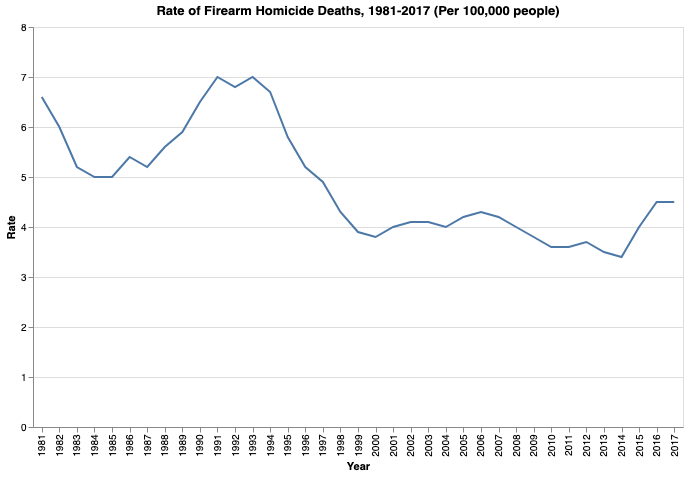

In [19]:
fa_chart9=fa_homicide_suicide[fa_homicide_suicide.Cause_of_Death=='Homicide Firearm']
str_title = '\n'.join([(str('Rate of Firearm Homicide Deaths, ')+str(str(fa_chart9['Year'].min())+'-'+ str(fa_chart9['Year'].max()))), '(Per 100,000 people)'])
alt.Chart(fa_chart9).mark_line().encode(
alt.X('Year:O', title='Year'),
alt.Y('Crude_Rate:Q', title = 'Rate',scale=alt.Scale(domain=[0, 8]))
).properties(
    title=str_title,
    width=650,
    height=400
)

Chart#10 Most gun deaths are suicides

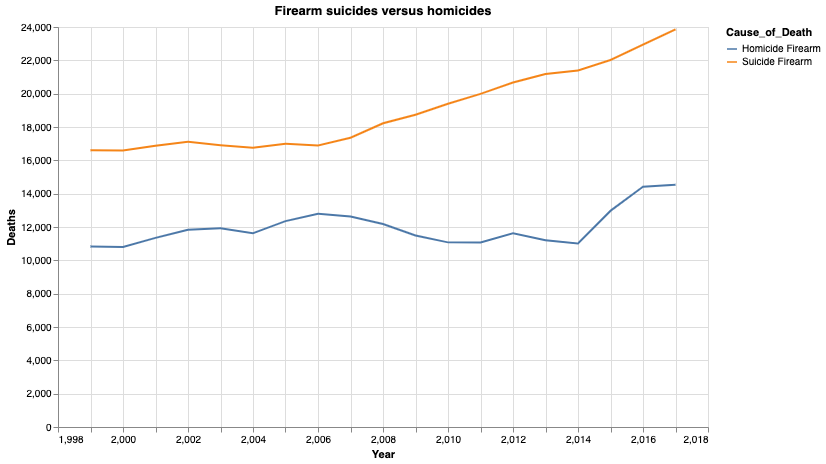

In [22]:
fa_chart10=fa_homicide_suicide[fa_homicide_suicide.Year>=1999]
alt.Chart(fa_chart10).mark_line().encode(
    x='Year',
    y='Deaths',
    color='Cause_of_Death'
).properties(
    title="Firearm suicides versus homicides",
    width=650,
    height=400
)

Chart#11 The states with the most guns report the most suicides
